
https://www.kaggle.com/c/titanic


In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [284]:
training_df = pd.read_csv("datasets/train.csv")

In [285]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(training_df.describe(include = "all"))

        PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                       Name   Sex         Age       SibSp  \
count                                   891   891  714.000000  891.000000   
unique                                  891     2         NaN         NaN   
top     Nasser, Mrs. Nicholas (Adele Achem)  male         NaN         NaN   
freq                                      1   577         NaN         NaN   
mean                                    NaN   NaN 


Impute mean Age for missing values


In [286]:
training_df[pd.isnull(training_df["Age"])]
mean_age = np.mean(training_df["Age"])
print(mean_age)
training_df_new = training_df
training_df_new["Age"].fillna(mean_age, inplace = True)
training_df_new


29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C



Null check


In [287]:
drop_na = training_df_new.dropna()
print(drop_na.shape)
#count decreases. there are still na values in the dataset

(202, 12)


In [288]:
## Remove Cabin column since it has too many missing values.

In [289]:
training_df_new = training_df_new.drop("Cabin",1)
print(training_df_new.describe(include= "all"))

        PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                       Name   Sex         Age       SibSp  \
count                                   891   891  891.000000  891.000000   
unique                                  891     2         NaN         NaN   
top     Nasser, Mrs. Nicholas (Adele Achem)  male         NaN         NaN   
freq                                      1   577         NaN         NaN   
mean                                    NaN   NaN 


Impute missing embarked values


In [290]:
training_df_new.groupby("Embarked").size()
# majority of the entries have embarked as 'S'
# imputing 'S' for missing values
training_df_new.fillna('S', inplace=True)
training_df_new[training_df_new["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


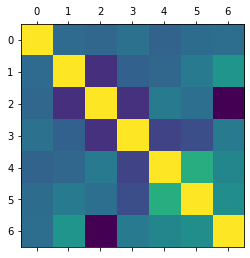

In [291]:
plt.matshow(training_df_new.corr())

In [292]:
training_df_new.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [293]:
data_np = training_df_new.values
print(type(data_np))
print(data_np)
print((training_df_new.columns))
print(data_np.shape)
# ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


<class 'numpy.ndarray'>
[[1 0 3 ... 'A/5 21171' 7.25 'S']
 [2 1 1 ... 'PC 17599' 71.2833 'C']
 [3 1 3 ... 'STON/O2. 3101282' 7.925 'S']
 ...
 [889 0 3 ... 'W./C. 6607' 23.45 'S']
 [890 1 1 ... '111369' 30.0 'C']
 [891 0 3 ... '370376' 7.75 'Q']]
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
(891, 11)


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0.42, 8.378, 16.336000000000002, 24.294000000000004, 32.252, 40.21,
        48.168000000000006, 56.126000000000005, 64.084, 72.042, 80.0],
       dtype=object),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

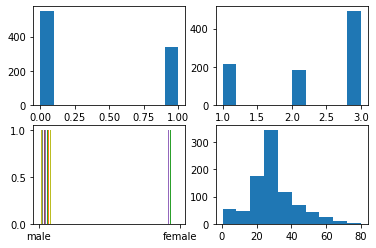

In [294]:
fig = plt.figure()
fig.suptitle("Training data visualization")
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(data_np[:,1])
ax2.hist(data_np[:,2])
ax3.hist(data_np[:,4])
ax4.hist(data_np[:,5])

In [398]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
training_set = training_df_new.drop(columns = ["Survived", "Name", "Ticket"])
print(training_set.columns)
# ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [399]:
print(training_set.iloc[:,2].head())
from copy import deepcopy
training_set_test = deepcopy(training_set)

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [400]:
# training_set_test.loc[:,training_set_test['Sex'] == "male"] = 1
# training_set_test.loc[:,training_set_test['Sex'] == "female"] = 0
# training_set_test.head()

training_set_test.loc[training_set_test['Sex'] == "female",'Sex'] = 0
training_set_test.loc[training_set_test['Sex'] == "male",'Sex'] = 1
training_set_test = pd.get_dummies(training_set_test, prefix=['Embarked'])
print(training_set_test.head())
# training_set.head()
# .replace("male",1,inplace = True).replace("female",0,inplace = True)
# training_set_test.describe(include="all")
# training_set_test.groupby("Sex").count()

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0            1       3    1  22.0      1      0   7.2500           0   
1            2       1    0  38.0      1      0  71.2833           1   
2            3       3    0  26.0      0      0   7.9250           0   
3            4       1    0  35.0      1      0  53.1000           0   
4            5       3    1  35.0      0      0   8.0500           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [401]:
training_set = deepcopy(training_set_test)
training_set.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [402]:
knn_model = knn.fit(training_set, training_df_new.loc[:,['Survived']])
output = knn_model.predict(training_set)
print(pd.crosstab(training_df_new['Survived'], output))

col_0       0    1
Survived          
0         479   70
1         149  193


/Users/siddharthsoni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [403]:
test_set = pd.read_csv('datasets/test.csv')
print(test_set.describe(include = 'all'))
test_set.columns

        PassengerId      Pclass                                    Name   Sex  \
count    418.000000  418.000000                                     418   418   
unique          NaN         NaN                                     418     2   
top             NaN         NaN  Straus, Mrs. Isidor (Rosalie Ida Blun)  male   
freq            NaN         NaN                                       1   266   
mean    1100.500000    2.265550                                     NaN   NaN   
std      120.810458    0.841838                                     NaN   NaN   
min      892.000000    1.000000                                     NaN   NaN   
25%      996.250000    1.000000                                     NaN   NaN   
50%     1100.500000    3.000000                                     NaN   NaN   
75%     1204.750000    3.000000                                     NaN   NaN   
max     1309.000000    3.000000                                     NaN   NaN   

               Age       Si

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [404]:
test_set1 = test_set.drop(["Cabin","Ticket","Name"],1)
test_set1.loc[test_set1.Sex == 'female','Sex'] = 0
test_set1.loc[test_set1.Sex == 'male','Sex'] = 1
print(test_set1.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    1  34.5      0      0   7.8292        Q
1          893       3    0  47.0      1      0   7.0000        S
2          894       2    1  62.0      0      0   9.6875        Q
3          895       3    1  27.0      0      0   8.6625        S
4          896       3    0  22.0      1      1  12.2875        S


In [405]:
test_set2 = pd.get_dummies(test_set1, prefix=['Embarked'])
test_set2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1


In [406]:
test_set2.describe(include="all")
test_set2["Age"].fillna(mean_age, inplace = True)
mean_fare = np.mean(test_set2.Fare)
test_set2["Fare"].fillna(mean_fare, inplace = True)
test_set2.describe(include="all")


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.154603,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933
std,120.810458,0.841838,0.481622,12.636666,0.896760,0.981429,55.840500,0.430019,0.313324,0.478803
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [407]:

print(test_set2.columns)
print(training_set.columns)
prediction_knn = knn_model.predict(test_set2)
prediction_knn

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [411]:
test_set3 = deepcopy(test_set2)
test_set3['Survived'] = prediction_knn
test_set3.groupby(['Survived']).agg(['count'])
for_csv = test_set3.loc[:,['PassengerId','Survived']]
for_csv.to_csv("kaggleSubmission.csv", index = False)